# Titanic Dataset

Predicts which passengers survived the Titanic shipwreck.

### Overview

The data has been split into two groups:
* training set (train.csv)
* test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

| Variable | Definition | Key |
|----------|------------|-----|
|survival | Survival | 0 = No, 1 = Yes | |
|pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
|sex | Sex |
|Age | Age in years | |
|sibsp | # of siblings / spouses aboard the Titanic | |
|parch | # of parents / children aboard the Titanic | |
|ticket | Ticket number | |
|fare | Passenger fare | |
|cabin | Cabin number | |
|embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Get the Data

In [1]:
import os
import zipfile
from typing import Optional, Tuple


def unzip_file(zipfile_path: str, destination_dir:Optional[str] = None):
    destination_dir = destination_dir or os.path.dirname(zipfile_path)
    with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
        zip_ref.extractall(destination_dir)

        
def download_competition(name:str, datasets_dir="./datasets/kaggle/") -> str:
    destination_dir = os.path.join(datasets_dir, name)
    ret = os.system(f"kaggle competitions download -p '{destination_dir}' -c {name}")
    return os.path.join(destination_dir, f"{name}.zip")

def get_titanic_dataset() -> Tuple[str, str]:
    zipfile_path = download_competition("titanic")
    unzip_file(zipfile_path)
    directory = os.path.dirname(zipfile_path)
    return os.path.join(directory, "train.csv"), os.path.join(directory, "test.csv")

train_csv, test_csv = get_titanic_dataset()

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


# Examine Data

In [2]:
import pandas as pd
import numpy as np

titanic = pd.read_csv(train_csv)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**NOTE** `Age`, `Cabin` and `Embarked` columns are incomplete!

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


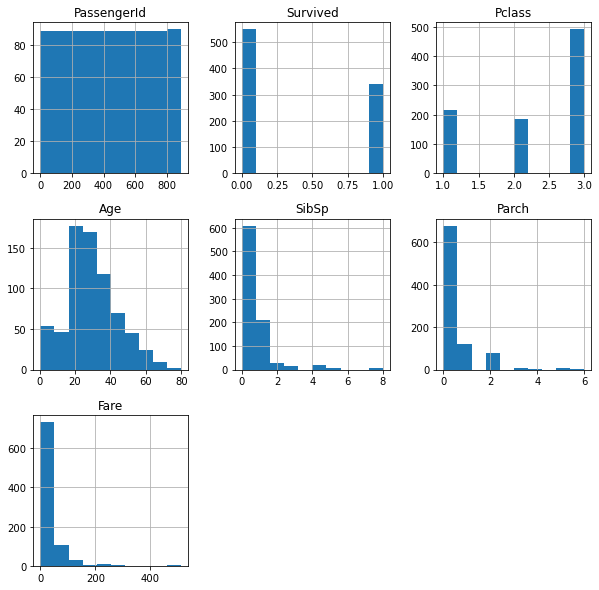

In [6]:
import matplotlib.pyplot as plt

plots = titanic.hist(figsize=(10, 10))

### Examine Fare vs Survival

In [7]:
titanic[titanic["Survived"] == 1]["Fare"].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
titanic[titanic["Survived"] == 0]["Fare"].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

**NOTE** Fare has an influence on survival (mean = 48 for survived vs 22 for not-survived).

### Examin Sex vs Survival

In [9]:
titanic[titanic["Sex"] == "male"]["Survived"].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [10]:
titanic[titanic["Sex"] == "female"]["Survived"].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [11]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
titanic[titanic["Survived"] == 1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

**NOTE** 74% of women survived while only 18% of males do. 68% of survived are females!

### Examine Age vs Survival

In [13]:
titanic["Age"].mean()

29.69911764705882

In [14]:
titanic[titanic["Survived"] == 1]["Age"].mean()

28.343689655172415

<AxesSubplot:>

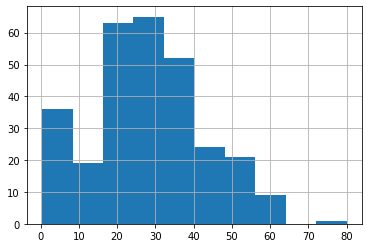

In [15]:
titanic[titanic["Survived"] == 1]["Age"].hist()

In [16]:
titanic[titanic["Survived"] == 0]["Age"].mean()

30.62617924528302

<AxesSubplot:>

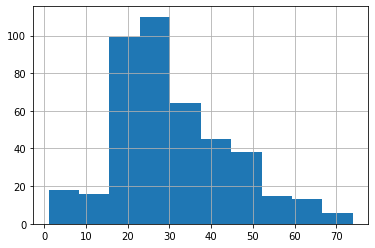

In [17]:
titanic[titanic["Survived"] == 0]["Age"].hist()

**NOTE** Not such a big difference in a mean age (28 vs 29) but we can clearly see that yound children had a priority. 

array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

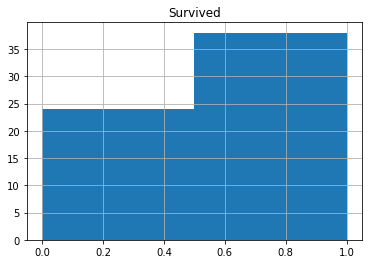

In [18]:
titanic[titanic["Age"] < 10].hist("Survived", bins=2)

array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

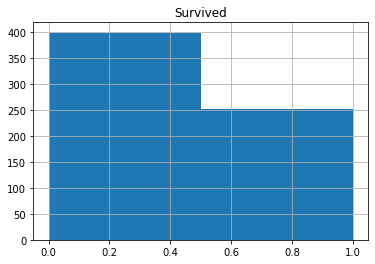

In [19]:
titanic[titanic["Age"] > 10].hist("Survived", bins=2)

# Prepare Data

In [20]:
labels = titanic["Survived"].copy()
features = titanic.drop("Survived", axis=1)

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [21]:
features["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class TicketParser(BaseEstimator, TransformerMixin):
    def __init__(self, parse:bool = True, add_type:bool = True):
        self.parse = parse
        self.add_type = add_type
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        tickets = X["Ticket"]
        X = X.drop("Ticket", axis=1)
        X["TicketNum"] = tickets.apply(self.parse_num)
        if self.add_type:
            X["TicketType"] = tickets.apply(self.parse_type)
        return X
    
    def split_ticket(self, ticket):
        parts = ticket.rsplit(" ", maxsplit=1)
        if len(parts) == 1 and parts[0].isdigit():
            return "None", parts[0]
        elif len(parts) == 1:
            return parts[0], ""
        elif len(parts) == 2 and not parts[1].isdigit():
            return ticket, ""
        else:
            return parts
    
    def parse_type(self, ticket):
        ticket_type, _ = self.split_ticket(ticket)
        return ticket_type.strip(" .") + "-TT"
    
    def parse_num(self, ticket):
        _, num = self.split_ticket(ticket)
        if num.isdigit():
            return int(num)

In [23]:
class NameHandler(BaseEstimator, TransformerMixin):
    def __init__(self, drop_names:bool = True):
        self.drop_names = drop_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.drop_names:
            return X.drop("Name", axis=1)
        return X

In [24]:
class FillNACat(BaseEstimator, TransformerMixin):
    def __init__(self, attributes=[], prefix="Unknown-"):
        self.attributes=attributes
        self.prefix=prefix
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if not self.attributes:
            return X
        X = X.copy()
        for attr in self.attributes:
            X[attr] = X[attr].fillna(self.prefix + attr)
        return X

In [25]:
class DropAttrs(BaseEstimator, TransformerMixin):
    def __init__(self, attributes=[]):
        self.attributes=attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if not self.attributes:
            return X
        X = X.copy()
        for attr in self.attributes:
            X = X.drop(attr, axis=1)
        return X

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

num_attrs = ["Pclass", "Age", "SibSp", "Parch", "Fare", "TicketNum"]
cat_attrs = ["Sex"] #, "Cabin", "Embarked"] #, "TicketType"]

full_pipeline = Pipeline([
    ("drop", DropAttrs(["PassengerId", "Embarked", "Cabin", "Name"])),
#     ("name_handler", NameHandler()),
    ("ticket_parser", TicketParser(add_type=False)),
#     ("fill_na_cat", FillNACat(attributes=["Cabin", "Embarked"])),
    ("column", ColumnTransformer([
        ("num", num_pipeline, num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])),
])

features = full_pipeline.fit_transform(features)
labels = titanic["Survived"]

# Train Random Forest

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(features, labels)
labels_pred_forest = cross_val_predict(forest_clf, features, labels, cv=5)

In [28]:
print(
    f1_score(labels, labels_pred_forest), 
    precision_score(labels, labels_pred_forest), 
    recall_score(labels, labels_pred_forest),
)

0.778115501519757 0.810126582278481 0.7485380116959064


In [29]:
from sklearn.metrics import precision_recall_curve

scores_forest = cross_val_predict(forest_clf, features, labels, cv=5, method="predict_proba")[:, 1]

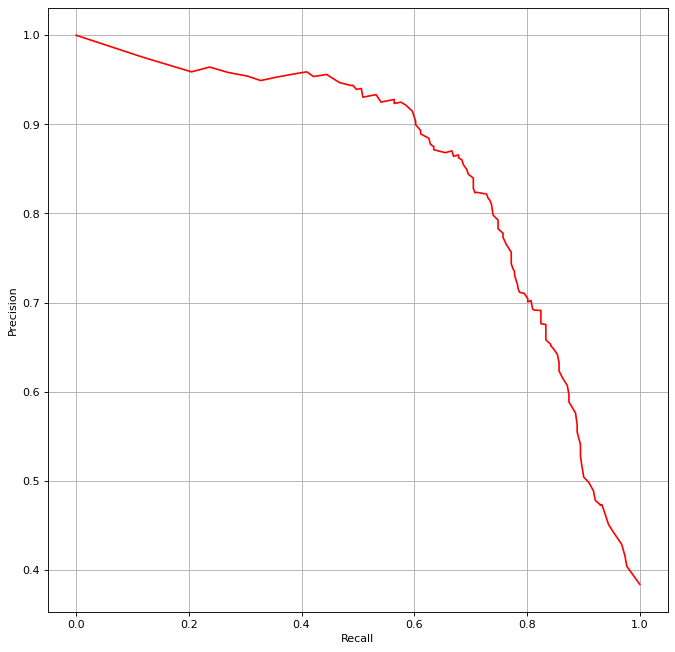

In [30]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(labels, scores_forest)

def plot_precision_recall_curve(precisions, recalls, axes=None, label=None, color="r"):
    axes = axes or plt.figure(figsize=(10, 10), dpi=80).add_subplot(1, 1, 1)
    axes.plot(recalls, precisions, color, label=label)
    axes.grid(visible=True)
    axes.set_xlabel("Recall")
    axes.set_ylabel("Precision")
    return axes

axes = plot_precision_recall_curve(precisions_forest, recalls_forest)

# Train SGD Classifier

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
labels_pred_sgd = cross_val_predict(sgd_clf, features, labels, cv=5)
scores_sgd = cross_val_predict(sgd_clf, features, labels, method="decision_function")

In [32]:
print(
    f1_score(labels, labels_pred_sgd), 
    precision_score(labels, labels_pred_sgd), 
    recall_score(labels, labels_pred_sgd),
)

0.6867469879518072 0.7080745341614907 0.6666666666666666


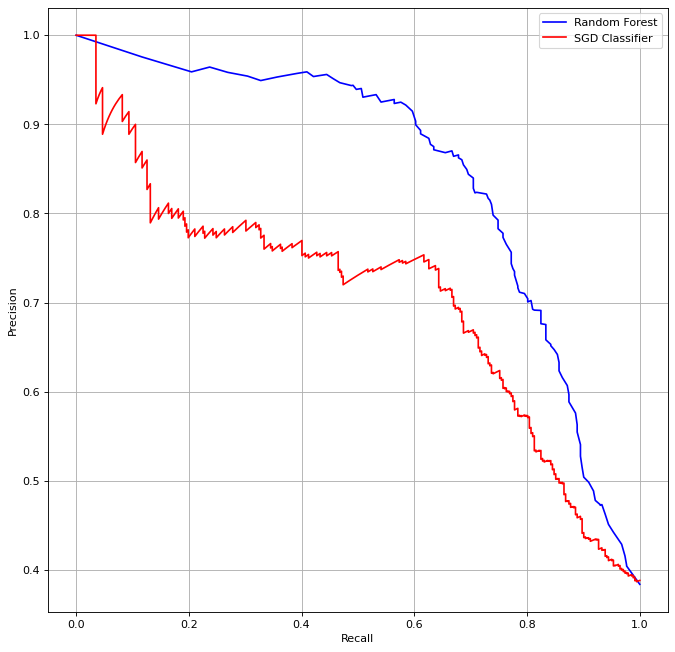

In [33]:
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(labels, scores_sgd)
axes = plt.figure(figsize=(10, 10), dpi=80).add_subplot(1, 1, 1)
plot_precision_recall_curve(precisions_forest, recalls_forest, axes, label="Random Forest", color="b")
plot_precision_recall_curve(precisions_sgd, recalls_sgd, axes, label="SGD Classifier", color="r")
axes.legend()

# Train KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
labels_pred_knn = cross_val_predict(knn_clf, features, labels, cv=5)
scores_knn = cross_val_predict(knn_clf, features, labels, cv=5, method="predict_proba")[:, 1]

In [35]:
print(
    f1_score(labels, labels_pred_knn), 
    precision_score(labels, labels_pred_knn), 
    recall_score(labels, labels_pred_knn),
)

0.7341389728096677 0.759375 0.7105263157894737


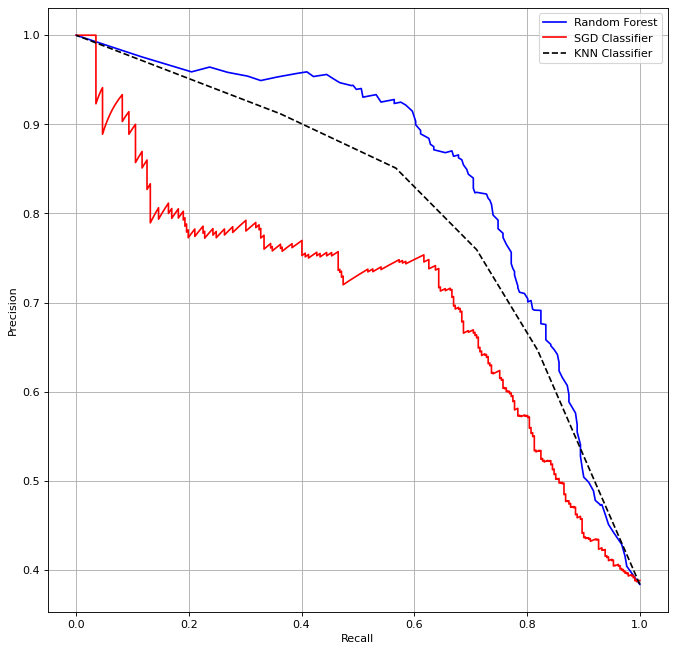

In [36]:
precisions_knn, recalls_knn, thresholds_knn = precision_recall_curve(labels, scores_knn)
axes = plt.figure(figsize=(10, 10), dpi=80).add_subplot(1, 1, 1)
plot_precision_recall_curve(precisions_forest, recalls_forest, axes, label="Random Forest", color="b")
plot_precision_recall_curve(precisions_sgd, recalls_sgd, axes, label="SGD Classifier", color="r")
plot_precision_recall_curve(precisions_knn, recalls_knn, axes, label="KNN Classifier", color="k--")
axes.legend()

In [37]:
counts = titanic["Survived"].value_counts()
survived = counts[1]
died = counts[0]
total = survived + died
counts

0    549
1    342
Name: Survived, dtype: int64

In [38]:
p0 = float(survived)/total
print("Random precision:", p0*survived/(p0*total)) # = p0 
print("Random recall:", p0*survived/survived) # = p0

Random precision: 0.38383838383838376
Random recall: 0.38383838383838376


# Fine-Tune Model

In [45]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {'n_estimators': [3, 10, 30, 40, 45, 50, 55, 60], 'max_features': [2, 4, 6, 7, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_clf = RandomForestClassifier()

grid_search = GridSearchCV(
    forest_clf, 
    params_grid, 
    cv=5, 
    scoring="f1", 
    return_train_score=True
)

grid_search.fit(features, labels)
grid_search.best_params_

{'max_features': 2, 'n_estimators': 50}

In [40]:
res_clf = grid_search.best_estimator_

labels_pred_res = cross_val_predict(res_clf, features, labels, cv=5)
scores_res = cross_val_predict(res_clf, features, labels, cv=5, method="predict_proba")

In [41]:
print(
    f1_score(labels, labels_pred_res), 
    precision_score(labels, labels_pred_res), 
    recall_score(labels, labels_pred_res),
)

0.7831325301204819 0.8074534161490683 0.7602339181286549


In [42]:
titanic_test = pd.read_csv(test_csv)
features_test = full_pipeline.fit_transform(titanic_test)
labels_test_pred = res_clf.predict(features_test)
labels_test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
res = titanic_test[["PassengerId"]].copy()
res["Survived"] = labels_test_pred
res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
res.to_csv("datasets/kaggle/titanic/result.csv", index=False)